In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import numpy as np

class PointPicker:
    def __init__(self, imgplot, img, color=(255,0,0), radius=20, thickness=20):
        self.imgplot = imgplot
        self.img = img
        self.color = color
        self.radius = radius
        self.thickness = thickness
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        self.points = []
    
    def __call__(self, event):
        if event.inaxes != self.imgplot.axes: 
            return
        ix = event.xdata
        iy = event.ydata
        print(f'x={ix}, y={iy}')
        self.img = cv.circle(self.img, (int(ix), int(iy)), self.radius, self.color, self.thickness)
        self.points.append((int(ix), int(iy)))
        
        imgplot.set_array(self.img)
        self.imgplot.figure.canvas.draw()

In [3]:
%matplotlib tk

img1 = cv.imread('data/1-left.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img1)
point_picker = PointPicker(imgplot, img1)
plt.show()

x=3006.5916129032257, y=1116.1038709677418
x=3360.3670967741937, y=1105.6987096774192
x=3360.3670967741937, y=1568.728387096774
x=3001.3890322580646, y=1662.3748387096775


src_pts  = 
 [(3006, 1116), (3360, 1105), (3360, 1568), (3001, 1662)]


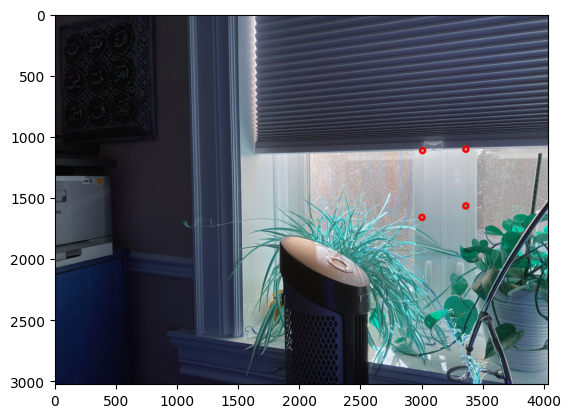

In [4]:
%matplotlib inline

src_pts  = point_picker.points
print('src_pts  = \n', src_pts)
plt.imshow(point_picker.img)
plt.show()

In [5]:
%matplotlib tk

img2 = cv.imread('data/1-right.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img2)
point_picker = PointPicker(imgplot, img2)
plt.show()

x=254.42645161290318, y=1053.6729032258063
x=623.8096774193548, y=1074.4832258064516
x=655.0251612903226, y=1542.7154838709675
x=275.2367741935484, y=1672.7799999999997


dst_pts = 
 [(254, 1053), (623, 1074), (655, 1542), (275, 1672)]


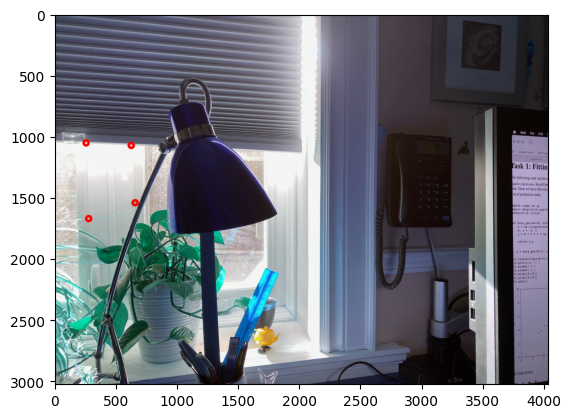

In [6]:
%matplotlib inline

dst_pts = point_picker.points
print('dst_pts = \n', dst_pts)
plt.imshow(point_picker.img)
plt.show()

In [7]:
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)

n_pts = len(src_pts)
A = np.zeros((n_pts*2, 9))
for i in range(0, n_pts*2, 2):
    j = int(i/2)
    x = src_pts[j][0]
    y = src_pts[j][1]
    xd = dst_pts[j][0]
    yd = dst_pts[j][1]

    A[i, 0] = x
    A[i, 1] = y
    A[i, 2] = 1
    A[i, 6] = -(x*xd)
    A[i, 7] = -(y*xd)
    A[i, 8] = -xd

    A[i+1, 3] = x
    A[i+1, 4] = y
    A[i+1, 5] = 1
    A[i+1, 6] = -(x*yd)
    A[i+1, 7] = -(y*yd)
    A[i+1, 8] = -yd

print('A = \n', A)

U, D, Vh = np.linalg.svd(A, full_matrices=True)
print('U = \n', U)
print('D = \n', D)
print('Vh = \n', Vh)

H_vec = Vh[-1]
print('H_vec = \n', H_vec)
print('A @ H_vec = \n', A @ H_vec)

H = np.reshape(H_vec, (-1, 3))
print('H = \n', H)

A = 
 [[    3006.     1116.        1.        0.        0.        0.  -763524.  -283464.     -254.]
 [       0.        0.        0.     3006.     1116.        1. -3165318. -1175148.    -1053.]
 [    3360.     1105.        1.        0.        0.        0. -2093280.  -688415.     -623.]
 [       0.        0.        0.     3360.     1105.        1. -3608640. -1186770.    -1074.]
 [    3360.     1568.        1.        0.        0.        0. -2200800. -1027040.     -655.]
 [       0.        0.        0.     3360.     1568.        1. -5181120. -2417856.    -1542.]
 [    3001.     1662.        1.        0.        0.        0.  -825275.  -457050.     -275.]
 [       0.        0.        0.     3001.     1662.        1. -5017672. -2778864.    -1672.]]
U = 
 [[-0.07995377 -0.08279842 -0.42908928 -0.34620476  0.64017585 -0.34203905  0.34493401  0.19230489]
 [-0.3314618  -0.34323326  0.18811996 -0.34503303  0.12104488  0.49948309 -0.29028548  0.51912062]
 [-0.21557901 -0.34075076 -0.44950675  0.5399

src_points = 
 [[   0    1    2 ... 8061 8062 8063]
 [   0    0    0 ... 3023 3023 3023]
 [   1    1    1 ...    1    1    1]]
dst_points = 
 [[-24494 -24432 -24371 ...   2695   2695   2695]
 [ -9529  -9505  -9481 ...   2110   2109   2109]
 [     1      1      1 ...      1      1      1]]


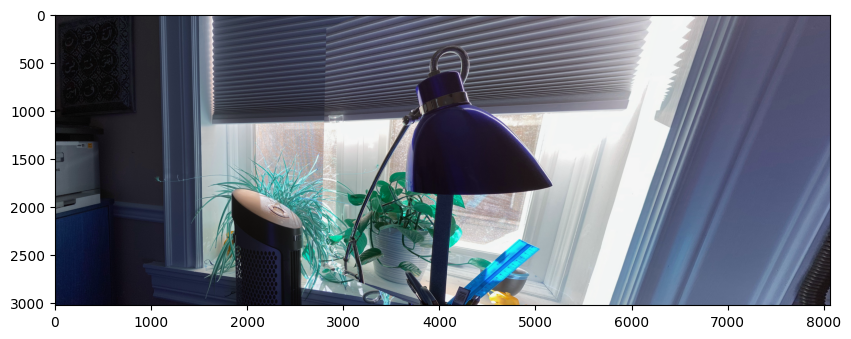

In [19]:
img1 = cv.imread('data/1-left.jpeg')
img2 = cv.imread('data/1-right.jpeg')
h, w, c = img1.shape

img = np.zeros((h, w*2, 3), np.uint8)
img[0:img1.shape[0], 0:img1.shape[1]] = img1 # put in the src img

# create 3xN_SRC_POINTS matrix
n = h*w*2
src_points = np.zeros((3, n))
idx = 0
for i in range(h):
    for j in range(w*2):
        src_points[0, idx+j] = j
    idx += w*2
idx = 0
for i in range(h):
    e_idx = idx+w*2
    src_points[1, idx:e_idx] = i
    idx = e_idx
src_points[2, :] = 1 # convert to homogenous
src_points = src_points.astype(int)
print('src_points = \n', src_points)

dst_points = H @ src_points
# convert to cartesian
dst_points = dst_points / dst_points[2, :]
dst_points = dst_points.astype(int)
print('dst_points = \n', dst_points)

# image stitching
for i in range(n):
    x = dst_points[0, i]
    y = dst_points[1, i]
    src_x = src_points[0, i]
    src_y = src_points[1, i]
    if (x < w and x >= 0) and (y < h and y >= 0):
        img[src_y, src_x, :] = img2[y, x, :]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()